In [1]:
from pyCDB.client import CDBClient
%pylab --no-import-all notebook

Populating the interactive namespace from numpy and matplotlib


In [2]:
from math import ceil
import collections

In [3]:
cdb = CDBClient()

In [4]:
X = np.load("No1.npy")

<IPython.core.display.Javascript object>


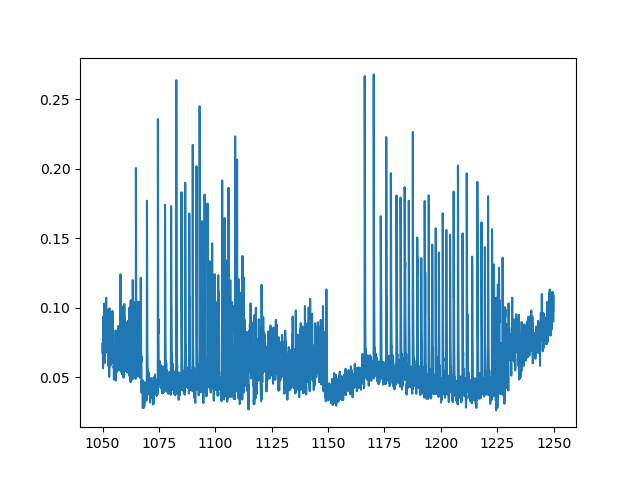

In [5]:
pylab.plot(X[0],X[1])


[ 1054.92  1067.17  1114.04  1116.87  1119.02  1127.5   1146.17  1268.49]
[ 1061.91  1112.75  1115.42  1118.38  1123.06  1144.19  1228.31  1270.39]
[ 1055.28  1055.69  1056.15  1056.62  1057.12  1058.62  1059.3   1059.52
  1060.32  1060.61  1060.87  1061.09  1061.59  1069.52  1074.4   1077.53
  1080.23  1082.55  1084.85  1086.48  1088.28  1089.82  1091.49  1092.88
  1093.96  1095.08  1096.36  1097.29  1098.4   1099.53  1100.23  1101.1
  1102.87  1103.99  1104.64  1105.65  1106.46  1107.2   1108.66  1109.45
  1110.18  1111.1   1111.89  1112.37  1114.67  1117.24  1117.76  1119.11
  1120.77  1121.34  1121.6   1122.45  1122.7   1128.04  1128.32  1128.61
  1129.73  1131.73  1133.68  1134.17  1135.    1135.3   1135.84  1136.15
  1137.37  1137.77  1138.13  1138.57  1139.15  1139.57  1140.52  1140.86
  1141.28  1142.24  1142.72  1143.33  1146.32  1146.62  1146.94  1147.21
  1147.93  1148.23  1149.07  1166.09  1170.08  1173.2   1175.63  1177.68
  1180.17  1181.98  1183.78  1185.64  1187.41  118

<IPython.core.display.Javascript object>


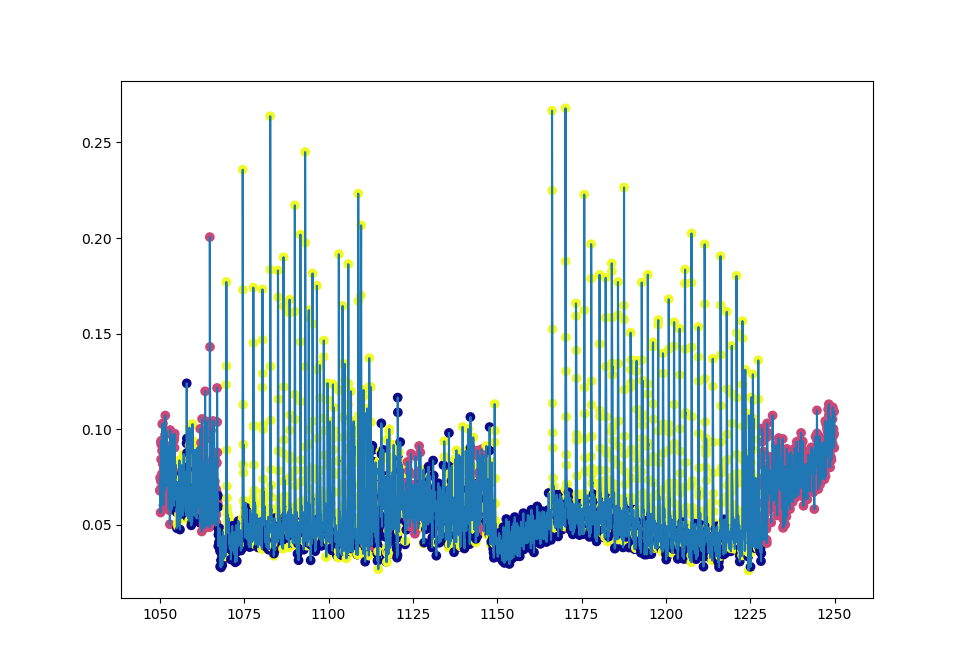

In [11]:
def labeling(record_number, DATA):
    hs = cdb.get_signal("t_H_mode_start:" + record_number).data
    print(hs)
    he = cdb.get_signal("t_H_mode_end:" + record_number).data
    print(he)
    es = cdb.get_signal("t_elm_start: " + record_number).data
    print(es)
    ee = cdb.get_signal("t_elm_end:" + record_number).data
    print(ee)
    
    data = {}
    for d in hs:
        data[d] = 0
    for d in he:
        data[d] = 1
    for d in es:
        data[d] = 2
    for d in ee:
        data[d] = 0
    data[DATA[0][len(DATA[0])-1]] = 1
    data[0] = 1
    
    LABELS = np.ones(len(DATA[0]))

    iterace = sorted(data)
    #print(iterace)
    it = 1
    #print(np.shape(DATA), np.shape(iterace))
    for i in range(len(DATA[0])):
        #print([i,it])
        if DATA[0][i]<iterace[it]:
            LABELS[i] = data[iterace[it-1]]
        else:
            LABELS[i] = data[iterace[it]]
            it += 1
    
    return LABELS
    
    
    
    #for dd in sorted(data):
    #    print(data[dd], dd)
    
states = labeling("11748",X).tolist()
#print(states)

pylab.figure("test")
pylab.plot(X[0],X[1])
pylab.scatter(X[0], X[1], c=states, cmap=plt.cm.plasma)
#labeling("11748",X)

In [7]:
XX = np.load("No7.npy")

In [8]:
np.load("No7_res.npy")

array(['Record number: ', '15546', 't_hmode: ', '1065.99', '1175.81',
       '1190.1100000000001', '1195.71', '1201.44'],
      dtype='<U32')

[ 1065.99  1175.81  1190.11  1195.71  1201.44]
[ 1173.57  1187.62  1191.86  1197.39  1202.96]
[ 1066.72  1070.13  1072.91  1076.24  1079.86  1082.33  1084.97  1087.96
  1090.52  1093.52  1096.4   1100.02  1103.25  1107.47  1112.93  1118.06
  1122.99  1126.04  1129.79  1132.87  1135.66  1138.59  1143.64  1150.62
  1154.77  1157.97  1160.38  1162.96  1165.13  1167.22  1169.28  1170.89
  1172.22  1177.81  1179.54  1181.63  1183.38  1184.65  1186.14  1190.83
  1196.11  1201.99]
[ 1067.44  1071.05  1073.73  1077.32  1081.29  1083.25  1085.95  1089.15
  1091.87  1094.95  1097.78  1101.06  1104.74  1108.63  1114.4   1119.54
  1124.41  1127.26  1130.96  1134.31  1137.15  1140.08  1145.05  1151.94
  1156.04  1159.21  1161.76  1164.31  1166.34  1168.52  1170.56  1172.14
  1173.54  1179.23  1180.82  1182.73  1184.29  1185.4   1187.27  1191.75
  1197.34  1202.54]


<IPython.core.display.Javascript object>


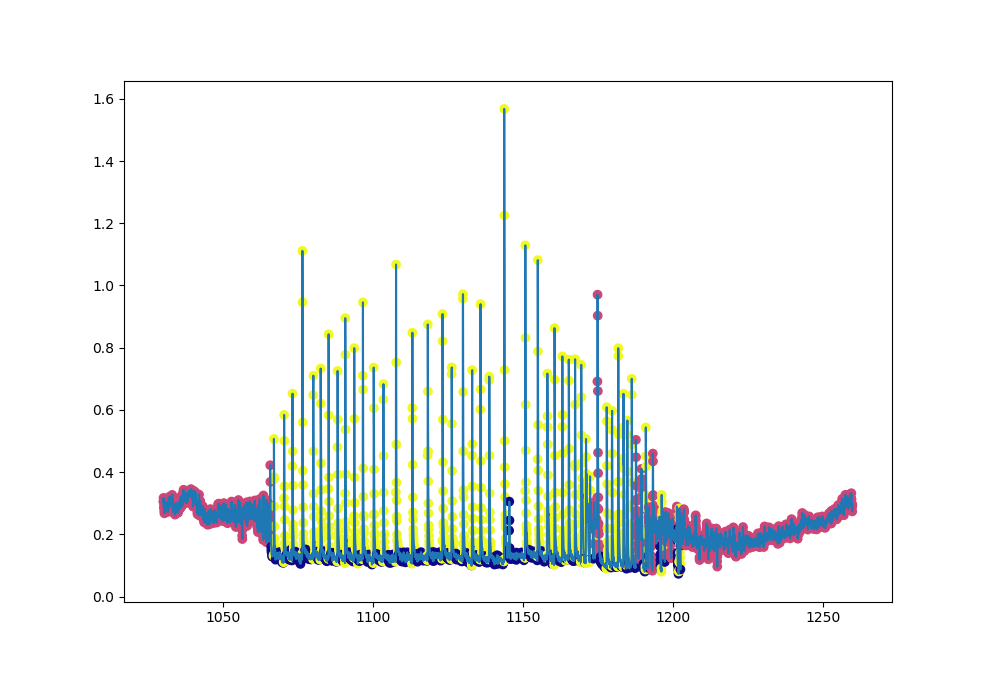

In [9]:
states = labeling("15546",XX).tolist()
#print(states)

pylab.figure("test 1")
pylab.plot(XX[0],XX[1])
pylab.scatter(XX[0], XX[1], c=states, cmap=plt.cm.plasma)

(3,)